In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

In [24]:
# Load Excel file
df = pd.read_excel("Zomato Dataset.csv")

# 1. Fill Delivery_person_Age with mean
df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].mean(), inplace=True)

# 2. Fill Delivery_person_Ratings with mean
df["Delivery_person_Ratings"].fillna(df["Delivery_person_Ratings"].mean(), inplace=True)

# 3. Fill Festival with mode, then encode (Label Encoding)
df["Festival"].fillna(df["Festival"].mode()[0], inplace=True)

# 4. Fill City with mode
df["City"].fillna(df["City"].mode()[0], inplace=True)

# 5. Fill multiple_deliveries with 0
df["multiple_deliveries"].fillna(0, inplace=True)

# Check results
print(df.isnull().sum())
print(df.head())


ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64
       ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0xcdcd      DEHRES17DEL01                 36.0                      4.2   
1  0xd987      KOCRES16DEL01                 21.0                      4.7   
2  0x2784     PUNERES13DEL03     

/tmp/ipython-input-3905904259.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Delivery_person_Age"].fillna(df["Delivery_person_Age"].mean(), inplace=True)
/tmp/ipython-input-3905904259.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [25]:
df = df.drop(columns=['Order_Date'])


In [26]:
df = df.drop(columns=['Time_Orderd','Time_Order_picked'])


In [27]:
import numpy as np
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'],
                                        df.loc[i, 'Restaurant_longitude'],
                                        df.loc[i, 'Delivery_location_latitude'],
                                        df.loc[i, 'Delivery_location_longitude'])

In [28]:
# Fill missing values with mode
df["Weather_conditions"].fillna(df["Weather_conditions"].mode()[0], inplace=True)
df["Road_traffic_density"].fillna(df["Road_traffic_density"].mode()[0], inplace=True)

/tmp/ipython-input-3823146792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weather_conditions"].fillna(df["Weather_conditions"].mode()[0], inplace=True)
/tmp/ipython-input-3823146792.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [29]:
df["multiple_deliveries"] = df["multiple_deliveries"].astype(int)
df["Delivery_person_Age"] = df["Delivery_person_Age"].astype(int)


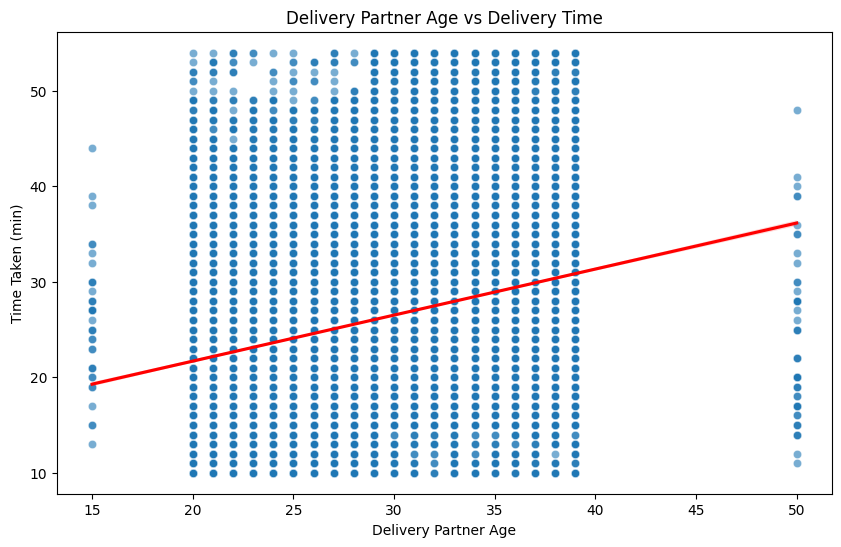

In [30]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Delivery_person_Age", y="Time_taken (min)", data=df, alpha=0.6)

# Add regression line (optional)
sns.regplot(x="Delivery_person_Age", y="Time_taken (min)", data=df, scatter=False, color='red')

plt.title("Delivery Partner Age vs Delivery Time")
plt.xlabel("Delivery Partner Age")
plt.ylabel("Time Taken (min)")
plt.show()

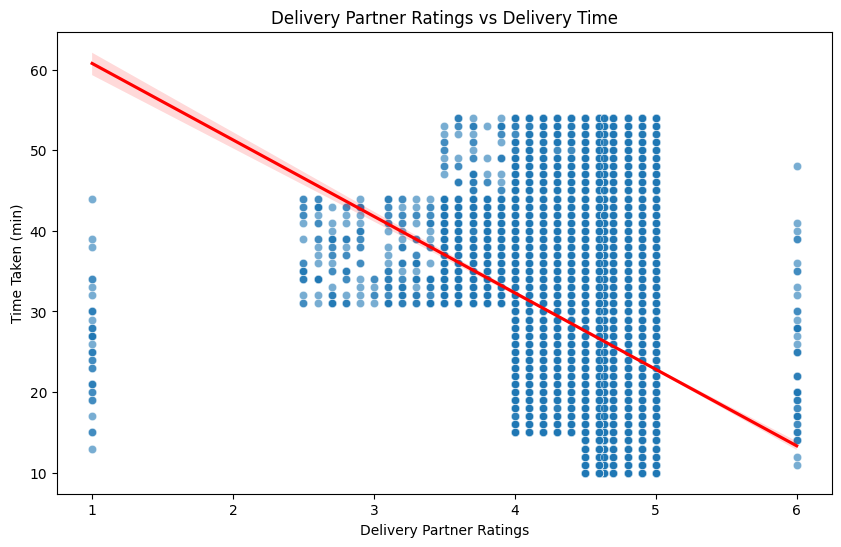

In [31]:
# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x="Delivery_person_Ratings", y="Time_taken (min)", data=df, alpha=0.6)

# Add regression line (optional)
sns.regplot(x="Delivery_person_Ratings", y="Time_taken (min)", data=df, scatter=False, color='red')

plt.title("Delivery Partner Ratings vs Delivery Time")
plt.xlabel("Delivery Partner Ratings")
plt.ylabel("Time Taken (min)")
plt.show()


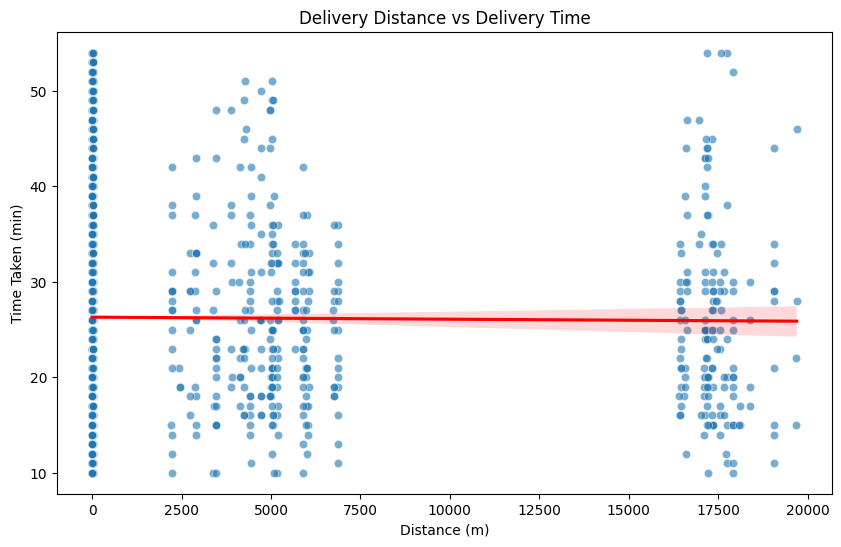

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="distance", y="Time_taken (min)", data=df, alpha=0.6)

# Add regression line
sns.regplot(x="distance", y="Time_taken (min)", data=df, scatter=False, color='red')

plt.title("Delivery Distance vs Delivery Time")
plt.xlabel("Distance (m)")
plt.ylabel("Time Taken (min)")
plt.show()


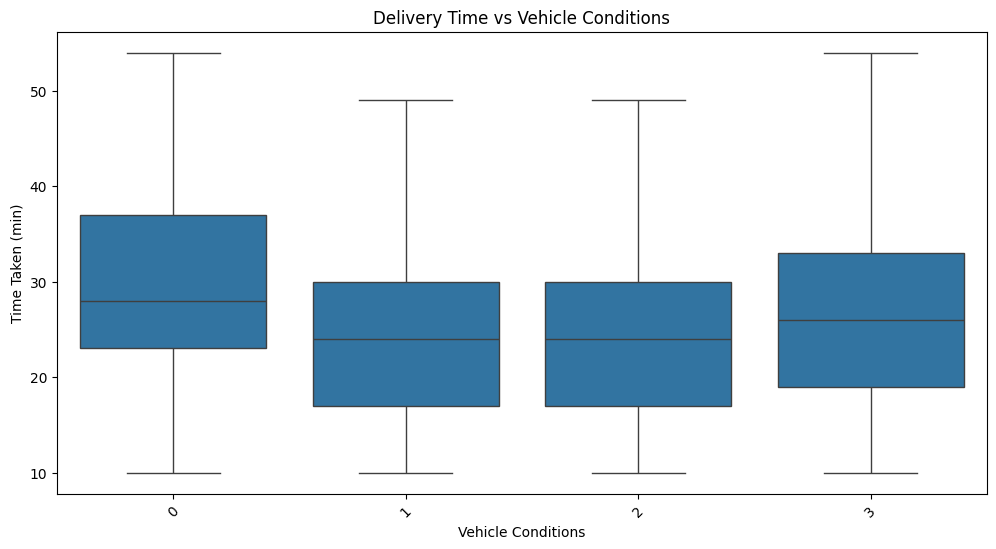

In [33]:
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(x="Vehicle_condition", y="Time_taken (min)", data=df)
plt.title("Delivery Time vs Vehicle Conditions")
plt.xlabel("Vehicle Conditions")
plt.ylabel("Time Taken (min)")
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()


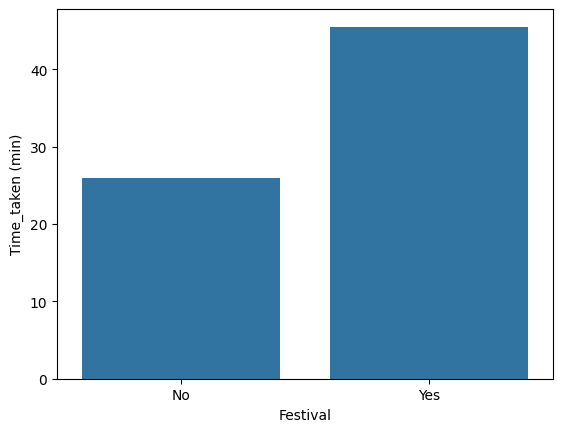

In [34]:
avg_time = df.groupby("Festival")["Time_taken (min)"].mean().reset_index()
sns.barplot(x="Festival", y="Time_taken (min)", data=avg_time)
plt.show()


/tmp/ipython-input-3235388252.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Weather_conditions", y="Time_taken (min)", data=avg_time_weather, palette="viridis")


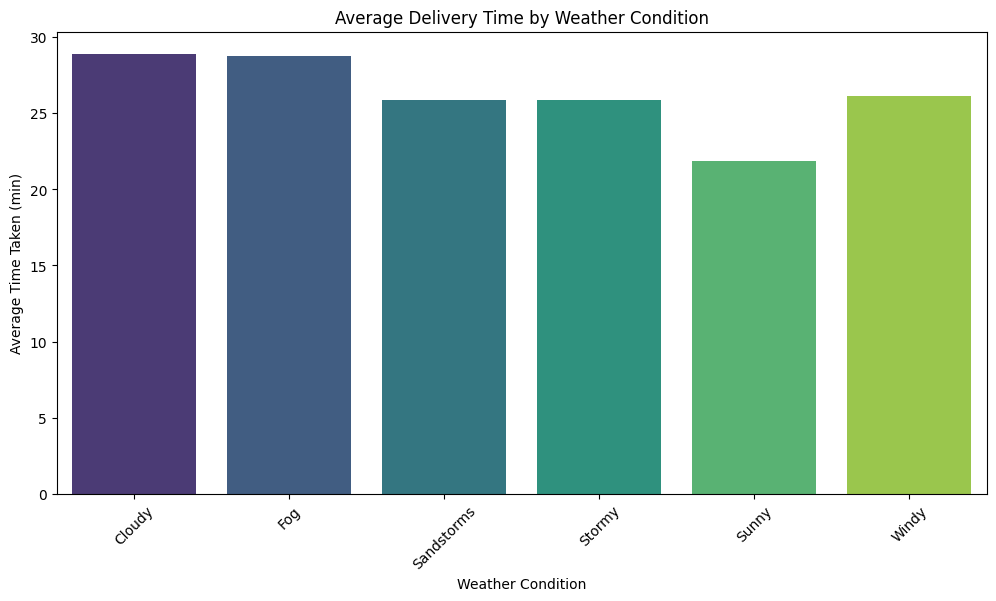

In [35]:
# Calculate average delivery time per weather condition
avg_time_weather = df.groupby("Weather_conditions")["Time_taken (min)"].mean().reset_index()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x="Weather_conditions", y="Time_taken (min)", data=avg_time_weather, palette="viridis")
plt.title("Average Delivery Time by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Time Taken (min)")
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()


/tmp/ipython-input-1859864028.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type_of_vehicle", y="Time_taken (min)", data=avg_time_vehicle, palette="mako")


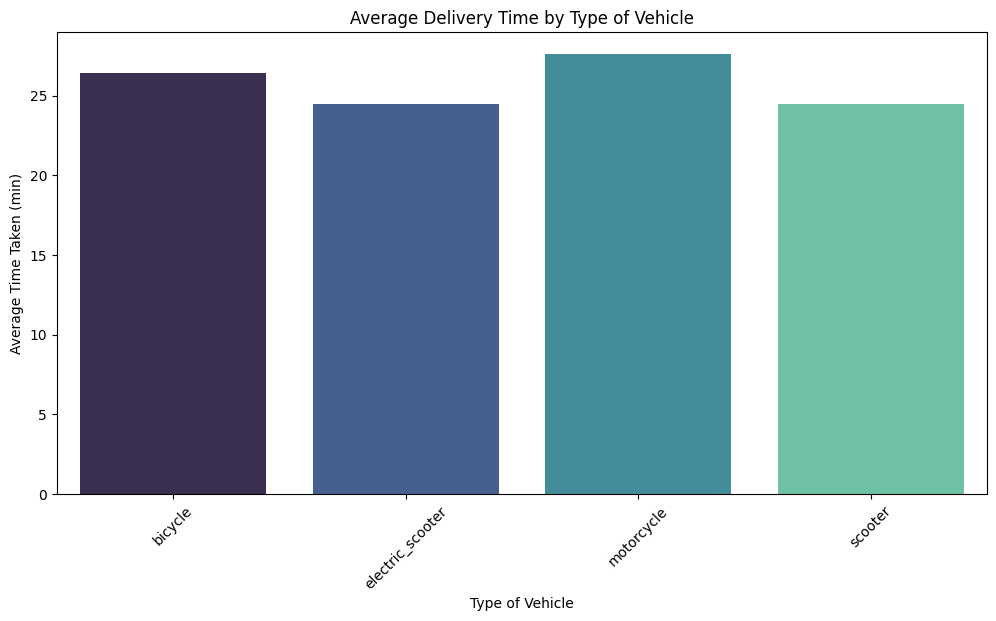

In [36]:
# Calculate average delivery time per vehicle type
avg_time_vehicle = df.groupby("Type_of_vehicle")["Time_taken (min)"].mean().reset_index()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x="Type_of_vehicle", y="Time_taken (min)", data=avg_time_vehicle, palette="mako")
plt.title("Average Delivery Time by Type of Vehicle")
plt.xlabel("Type of Vehicle")
plt.ylabel("Average Time Taken (min)")
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()


/tmp/ipython-input-1955748307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type_of_order", y="Time_taken (min)", data=avg_time_weather, palette="viridis")


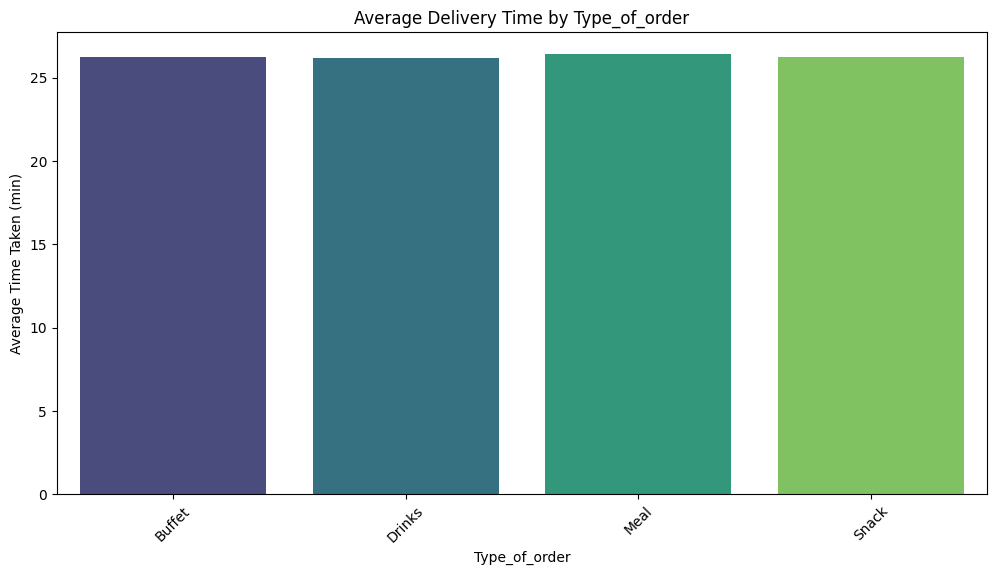

In [37]:
# Calculate average delivery time per weather condition
avg_time_weather = df.groupby("Type_of_order")["Time_taken (min)"].mean().reset_index()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x="Type_of_order", y="Time_taken (min)", data=avg_time_weather, palette="viridis")
plt.title("Average Delivery Time by Type_of_order")
plt.xlabel("Type_of_order")
plt.ylabel("Average Time Taken (min)")
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()


/tmp/ipython-input-360986614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Time_taken (min)", data=avg_time_weather, palette="viridis")


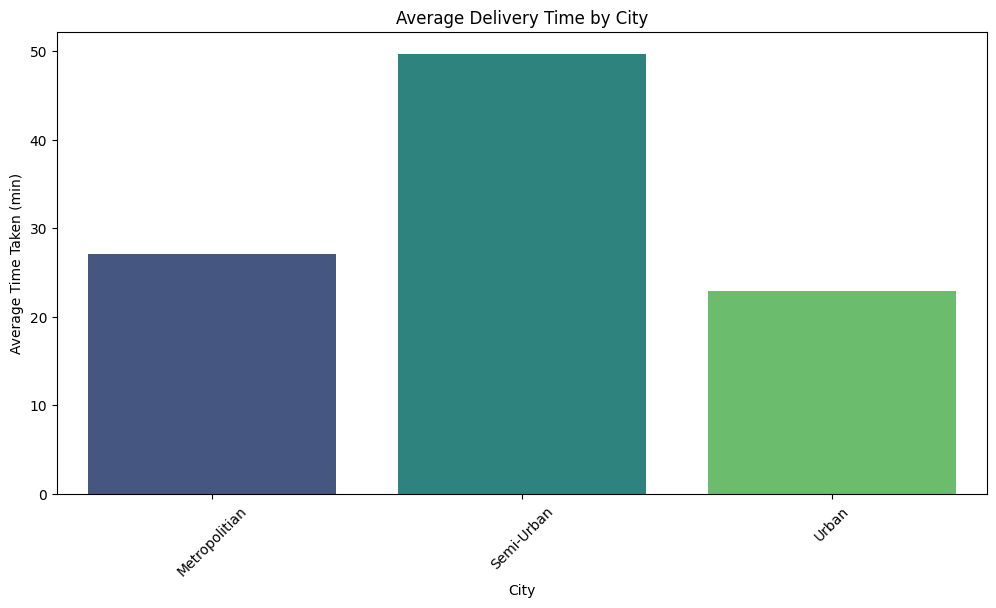

In [38]:
# Calculate average delivery time per weather condition
avg_time_weather = df.groupby("City")["Time_taken (min)"].mean().reset_index()

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x="City", y="Time_taken (min)", data=avg_time_weather, palette="viridis")
plt.title("Average Delivery Time by City")
plt.xlabel("City")
plt.ylabel("Average Time Taken (min)")
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()


In [39]:
# Select features & target
features = ['Delivery_person_Ratings', 'Delivery_person_Age', 'distance']  # add 'Festival' if dataset allows
target = 'Time_taken (min)'

X = df[features]
y = df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate Model
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2 Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")


R2 Score: 0.380
MAE: 5.83


In [40]:
ratings = float(input("Enter Delivery Person Ratings (e.g., 4.5): "))
age = int(input("Enter Delivery Person Age (e.g., 25): "))
distance = float(input("Enter Distance in km (e.g., 5.2): "))

user_input = pd.DataFrame({
    'Delivery_person_Ratings': [ratings],
    'Delivery_person_Age': [age],
    'distance': [distance]
})

predicted_time = float(xgb_model.predict(user_input)[0])

# Convert to hours + minutes
hours = int(predicted_time // 60)
minutes = int(round(predicted_time % 60))

if hours > 0:
    print(f"Estimated Delivery Time: {hours} hr {minutes} min")
else:
    print(f"Estimated Delivery Time: {minutes} min")

Enter Delivery Person Ratings (e.g., 4.5): 4.5
Enter Delivery Person Age (e.g., 25): 25
Enter Distance in km (e.g., 5.2): 5.2
Estimated Delivery Time: 20 min
